In [1]:
import numpy as np
from stl import mesh
import cv2 as cv
from PIL import Image
from PIL import ImageFilter
import matplotlib.pyplot as plt

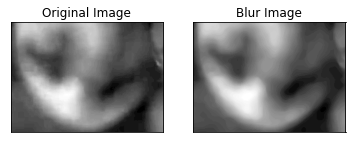

(177, 245)

In [9]:
img = cv.imread('teeth_dataset/teeth_dataset/footage/4.png',0)
gray_img = cv.medianBlur(img,9)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray_img,cmap = 'gray')
plt.title('Blur Image'), plt.xticks([]), plt.yticks([])
plt.show()
imageNp = np.array(gray_img)
imageNp.shape

In [10]:
img = cv.imread('teeth_dataset/teeth_dataset/footage/4.png', cv.IMREAD_GRAYSCALE)
gray_img = cv.medianBlur(img,9)
max_height= gray_img.shape[1]/1.618
min_height=0

imageNp = np.array(gray_img)
maxPix=imageNp.max()
minPix=imageNp.min()

print(imageNp)
(nrows,ncols)=gray_img.shape

vertices=np.zeros((nrows,ncols,3))

for x in range(0, nrows):
  for y in range(0, ncols):
    pixelIntensity = imageNp[x][y]
    z = ((pixelIntensity) * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[x][y]=(x, y, z)

faces=[]

for x in range(0, nrows - 1):
  for y in range(0, ncols - 1):
    # create face 1 and face 2
    vertice1 = vertices[x][y]
    vertice2 = vertices[x+1][y]
    vertice3 = vertices[x+1][y+1]
    vertice4 = vertices[x][y+1]
    
    face1 = np.array([vertice1,vertice2,vertice3])
    face2 = np.array([vertice1,vertice4,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file
surface.save('tooth_3D_model.stl')
print(surface)

[[56 56 64 ... 80 82 82]
 [56 56 64 ... 80 82 82]
 [56 56 64 ... 80 82 82]
 ...
 [64 64 64 ... 92 93 93]
 [61 61 61 ... 92 93 93]
 [61 61 61 ... 92 93 93]]
number of faces: 85888
